<a href="https://colab.research.google.com/github/nutapol97/Python-for-DS-AI_Nutapol_T./blob/main/Unsupervised_Learning_Clustering_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import multivariate_normal
import math
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)


In [2]:
class GMM():
  def __init__(self, max_iter = 20,K = 3):
    self.max_iter=max_iter
    self.K=K
  def fit(self,X):
    self.m, self.n = X.shape
    self.oldNLL = 0
    self.r = np.full(shape=(self.m, self.K), fill_value=1/self.K)
    self.pi = np.full((self.K, ), fill_value=1/self.K) 
    self.random_row = np.random.randint(low=0, high=self.m, size=self.K)
    mean = np.array([X[idx,:] for idx in self.random_row ]).T 
    cov = np.array([np.cov(X.T) for _ in range (self.K)])
    for iteration in range(self.max_iter):
        for i in range(self.m):
            for k in range(self.K):
                xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:,k], cov=cov[k])
                self.r[i, k] = self.pi[k] * xi_pdf
            self.r[i] /= np.sum(self.r[i])
        NLL = 0
        for i in range(self.m):
            for k in range(self.K):
                NLL += math.log(self.pi[k])
                NLL += multivariate_normal.logpdf(
                    X[i], mean=mean[:, k], cov=cov[k])
        if(iteration % 5 == 0):
          preds = np.argmax(self.r, axis=1)
          plt.figure()
          plt.scatter(X[:, 0], X[:, 1], c=preds)
          plt.title(f"Iteration: {iteration}")
          print("NLL smaller? ", NLL)
          print("NLL difference: ", math.fabs(NLL - self.oldNLL))

        if(math.fabs(NLL-self.oldNLL) < 5):
          print("Final NLL: ", NLL)
          print("final difference: ", math.fabs(NLL - self.oldNLL))
          break
        self.oldNLL = NLL
        NK = np.sum(self.r, axis=0)
        assert NK.shape == (self.K, )
        pi = NK / self.m
        assert pi.shape == (self.K, )
        mean =  ( X.T @ self.r ) / NK
        assert mean.shape == (self.n, self.K)
        for k in range(self.K):
            for i in range(self.m):
                X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
                cov[k] += self.r[i, k] * (X_mean @ X_mean.T)
            cov[k] /= NK[k]
        assert cov.shape == (self.K, self.n, self.n)
    return self.r
  def predic(self,r):
    return  np.argmax(r, axis=1)
  def plot(self,X,yhat):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=yhat)
    plt.title("Result")  


NLL smaller?  -37751.95084048295
NLL difference:  37751.95084048295
NLL smaller?  -146565.0164447047
NLL difference:  13553.944006347592
NLL smaller?  -183026.86960771208
NLL difference:  2871.3545550951385
NLL smaller?  -639744.7621959903
NLL difference:  4487.199339831015


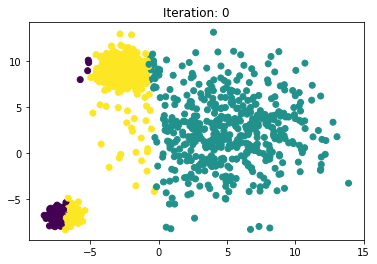

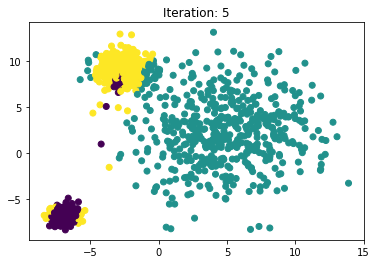

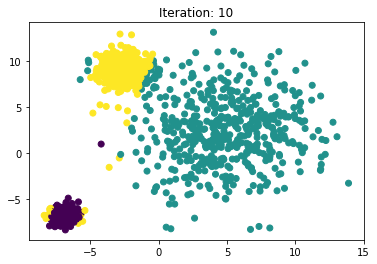

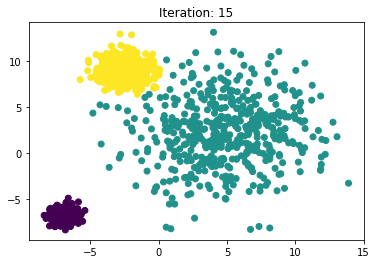

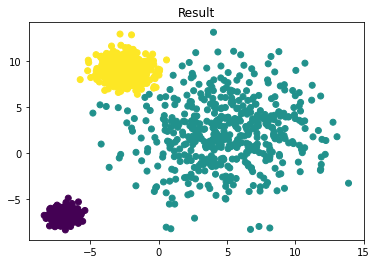

In [3]:
model=GMM()
r=model.fit(X)
yhat=model.predic(r)
model.plot(X,yhat)